# Basketball field goal rate

**Scenario:** We model the *field goal rate* of basketball players. A player's field goal rate is an important factor in how valuable they are to the team. The field goal rate is simply the number of throws made divided by the number of throws attempted during normal play in basketball. [Video: NBA 10 longest ever field goals.](https://www.youtube.com/watch?v=BSLYEzMMmLI)

**Data:** The number of field goals attempted (FGA) and made (FGM) are tracked for important basketball divisions, so we have lots of data available. See the FGM-FGA column on [this page](http://www.espn.com/nba/player/gamelog/_/id/2594922/otto-porter-jr). The FG% column is simply FGM / FGA (assuming FGA is not 0).

**Stop and think:** How would you model this scenario?
* How are the data generated?
* What parameters do we need to effectively model the data?
* From why types of distributions would the parameters be generated?

In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

# Field goal rate data. Each tuple contains (field goals made, field goals attempted).
player_field_goal_data = {
    # http://www.espn.com/nba/player/gamelog/_/id/2594922/year/2018/otto-porter-jr
    'Otto Porter Jr': [(0, 0), (4, 9), (4, 8), (3, 7), (5, 10), (4, 7), (0, 0), (5, 8), (4, 9)],
    # http://www.espn.com/nba/player/gamelog/_/id/3024/year/2018/jj-redick
    'JJ Redick': [(5, 13), (3, 11), (6, 15), (9, 17), (7, 13), (6, 13), (8, 18), (4, 9), (4, 13)],
    # http://www.espn.com/nba/player/gamelog/_/id/3213/year/2018/al-horford
    'Al Horford': [(7, 12), (2, 8), (4, 9), (5, 13), (2, 4), (5, 13), (8, 10), (7, 16), (4, 6)],
}

We start by modeling a single basketball player the same way we did medical trial data, by assuming that their field goal rate is consistent between games. The generative model is that a player's field goal rate, $p_i$ for player $i$, comes from a $\text{Beta}(1,1)$ distribution (a uniform distribution). When the player plays a game where they get $n_{ij}$ field goal attempts, the number of successes $k_{ij}$ comes from a $\text{Binomial}(n_{ij}, p_i)$ distribution.

The code below implements this model and estimates the field goal rate for 3 different players from the data given.

**Task:** Read through the code below and make sure you understand it. Discuss with other students if that helps.

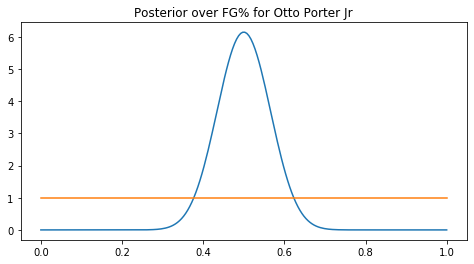

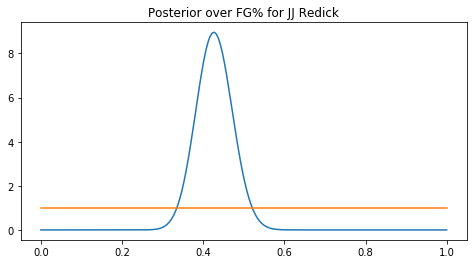

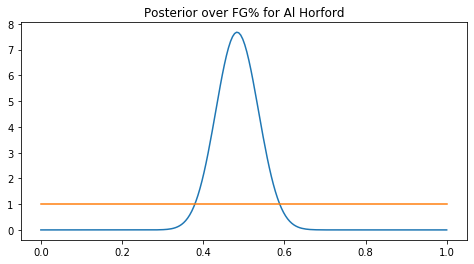

In [5]:
for player in player_field_goal_data.keys():
    
    # Prior: Beta distribution
    alpha_prior = 1
    beta_prior = 1
    prior_field_goal_rate = sts.beta(alpha_prior, beta_prior)

    # Likelihood: Binomial distribution
    total_successes = sum(game[0] for game in player_field_goal_data[player])
    total_failures = sum(game[1] - game[0] for game in player_field_goal_data[player])

    # Posterior: Beta distribution
    alpha_post = alpha_prior + total_successes
    beta_post = beta_prior + total_failures
    
    posterior_field_goal_rate = sts.beta(alpha_post, beta_post)

    plt.figure(figsize=(8,4))
    plot_x = np.linspace(0, 1, 200)
    plot_y = posterior_field_goal_rate.pdf(plot_x)
    plot_prior = prior_field_goal_rate.pdf(plot_x)
    plt.plot(plot_x, plot_y)
    plt.plot(plot_x , plot_prior)
    plt.title('Posterior over FG% for ' + player)

plt.show()

## Critiquing the model

What does this model tell us about a different basketball player, for whom we have not yet seen any data?

According to the generative model we should
1. generate a field goal rate for the player from the uniform prior, and
2. we can predict the number of field goals they will attain in a game from the prior predictive Binomial distribution.

Note that this is different from the players for which we already have data. Their posterior predictive Binomial distributions are much more specific than the prior predictive. For the new player we cannot be more specific than the prior predictive since we do not know their game statistics yet.

However this doesn't seem right. Surely the data about the other 3 players should tell us something about the 4th player? All four of them are high-level professional players after all. By seeing data for some players (the more, the better) we should be able to learn something about how well players in general can convert field goals from the data provided. This estimate about players overall should inform our predictions about a new player for whom we do not have any data.

The technical shortcoming of the model above is that we cannot update the values of $\alpha$ and $\beta$ in the prior, used to generate the field goal rate for a new player. In the model above we treat $\alpha$ and $\beta$ as known, fixed hyperparameters (with value 1).

To improve this model we can instead treat $\alpha$ and $\beta$ as unknown parameters — and our first guess could still be that their values are around 1. If they are *unknown* parameters, we need a prior for them and then, given some data, we can compute a posterior.

## Task
Describe this new model, with unknown $\alpha$ and $\beta$, using generative modeling language.

In the first model we have a universe where each player gets given an expected field goal rate from the uniform distribution. The expected field goal rate is always the same in all their games. In any particular game, the number of successful field goals are given by a binomial distribution.

How would you describe the new model?
* Write your answer in a Google doc, share it, and be ready to paste a link to your shared doc in poll in class.